In [1]:
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
with open('rattlesnake_grouped_with_weather.pickle', 'rb') as read_file:
    df = pickle.load(read_file)
    
df.head()

,timestamp,year,month,day,trail_condition,rating,counts,datetime,Sea_Temp-Max,Sea_Temp-Min,...,Sea_Snow_Depth,Ced_Temp-Max,Ced_Temp-Min,Ced_Temp-Avg,Ced_Departure,Ced_Precipitation,Ced_New_Snow,Ced_Snow_Depth,day_of_week,is_weekend
0,2010-01-23,9,1,23,,4.0,1,2010-01-23,49,40,...,0,46.0,37.0,41.5,5.2,0.27,0.0,0.0,Saturday,True
1,2010-02-07,9,2,7,,4.0,1,2010-02-07,49,44,...,0,48.0,38.0,43.0,6.3,0.17,0.0,0.0,Sunday,True
2,2010-02-21,9,2,21,,4.0,2,2010-02-21,57,36,...,0,50.0,30.0,40.0,2.5,0.00,0.0,0.0,Sunday,True
3,2010-03-14,9,3,14,,4.0,1,2010-03-14,53,35,...,0,42.0,29.0,35.5,-4.4,0.00,0.0,0.0,Sunday,True
4,2010-03-20,9,3,20,,4.0,1,2010-03-20,67,37,...,0,56.0,34.0,45.0,4.4,0.00,0.0,0.0,Saturday,True


In [3]:
df['datetime'] = pd.to_datetime(df['datetime']) - pd.to_timedelta(7, unit='d')
df = df.groupby(['timestamp', pd.Grouper(key='datetime', freq='W-MON')])['counts'].sum().reset_index().sort_values('datetime')
df.head()

,timestamp,datetime,counts
0,2010-01-23,2010-01-18,1
1,2010-02-07,2010-02-01,1
2,2010-02-21,2010-02-15,2
3,2010-03-14,2010-03-08,1
4,2010-03-20,2010-03-15,1


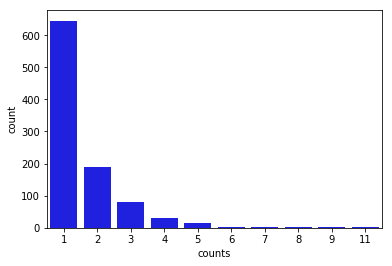

In [16]:
sns.countplot(x='counts',data=df,color='Blue')

In [17]:
df.mean()

counts    1.557632
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 962
Data columns (total 3 columns):
timestamp    963 non-null object
datetime     963 non-null datetime64[ns]
counts       963 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 30.1+ KB


In [6]:
df.head()

,timestamp,datetime,counts
0,2010-01-23,2010-01-18,1
1,2010-02-07,2010-02-01,1
2,2010-02-21,2010-02-15,2
3,2010-03-14,2010-03-08,1
4,2010-03-20,2010-03-15,1
